In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Specify the file path
file_path = "Resources/top_10k_streamed_songs.csv"

# Read the CSV file into a Pandas DataFrameK
topStreamedSongs_df = pd.read_csv(file_path)

# Display the DataFrame in table format
display(topStreamedSongs_df.head())

Position    Artist Name                                   Song Name  Days  \
0         1   Post Malone   Sunflower  SpiderMan: Into the SpiderVerse  1506   
1         2    Juice WRLD                                 Lucid Dreams  1673   
2         3  Lil Uzi Vert                                XO TOUR Llif3  1853   
3         4       J. Cole                               No Role Modelz  2547   
4         5   Post Malone                                     rockstar  1223   

   Top 10 (xTimes)  Peak Position Peak Position (xTimes)  Peak Streams  \
0              302              1                  (x29)       2118242   
1              178              1                  (x20)       2127668   
2              212              1                   (x4)       1660502   
3                6              7                      0        659366   
4              186              1                 (x124)       2905678   

   Total Streams  
0      883369738  
1      864832399  
2      781153024  
3      734857487  
4      718865961

In [3]:
# Specify the file path
file_path = "Resources/lyrics.csv"

# Read the CSV file into a Pandas DataFrame
lyricgenius_df = pd.read_csv(file_path)

# Display the DataFrame in table format
display(lyricgenius_df.head())

Unnamed: 0    Artist Name                                   Song Name  \
0           0   Post Malone   Sunflower  SpiderMan: Into the SpiderVerse   
1           1    Juice WRLD                                 Lucid Dreams   
2           2  Lil Uzi Vert                                XO TOUR Llif3   
3           3       J. Cole                               No Role Modelz   
4           4   Post Malone                                     rockstar   

                                              Lyrics  
0  [Swae Lee:]\nAyy, ayy, ayy, ayy (ooh)\nOoh, oo...  
1  Enviyon on the mix\nNo, no, no, no\nNo-no, no,...  
2  Are you alright?\nI'm alright, I'm quite alrig...  
3  First things first rest in peace Uncle Phil\nF...  
4  [Post Malone:]\nHahahahaha\nTank God\n\nAyy, I...

In [4]:
# Merge the two DataFrames using 'Artist Name' and 'Song Name'
merged_df2 = pd.merge(topStreamedSongs_df, lyricgenius_df, on=['Artist Name', 'Song Name'], how='left')

# Display the merged DataFrame
display(merged_df2.head())

Position    Artist Name                                   Song Name  Days  \
0         1   Post Malone   Sunflower  SpiderMan: Into the SpiderVerse  1506   
1         2    Juice WRLD                                 Lucid Dreams  1673   
2         3  Lil Uzi Vert                                XO TOUR Llif3  1853   
3         4       J. Cole                               No Role Modelz  2547   
4         5   Post Malone                                     rockstar  1223   

   Top 10 (xTimes)  Peak Position Peak Position (xTimes)  Peak Streams  \
0              302              1                  (x29)       2118242   
1              178              1                  (x20)       2127668   
2              212              1                   (x4)       1660502   
3                6              7                      0        659366   
4              186              1                 (x124)       2905678   

   Total Streams  Unnamed: 0  \
0      883369738         0.0   
1      864832399         1.0   
2      781153024         2.0   
3      734857487         3.0   
4      718865961         4.0   

                                              Lyrics  
0  [Swae Lee:]\nAyy, ayy, ayy, ayy (ooh)\nOoh, oo...  
1  Enviyon on the mix\nNo, no, no, no\nNo-no, no,...  
2  Are you alright?\nI'm alright, I'm quite alrig...  
3  First things first rest in peace Uncle Phil\nF...  
4  [Post Malone:]\nHahahahaha\nTank God\n\nAyy, I...

In [5]:
# Define a function to count total words and unique words
def count_words(lyrics):
    if pd.isna(lyrics) or lyrics == "0":
        return 0, 0
    else:
        words = lyrics.split()
        total_words = len(words)
        unique_words = len(set(words))
        return total_words, unique_words

# Apply the function to create new columns
merged_df2[['Total Words', 'Unique Words']] = merged_df2['Lyrics'].apply(count_words).apply(pd.Series)

# Display the modified DataFrame
display(merged_df2.head())

Position    Artist Name                                   Song Name  Days  \
0         1   Post Malone   Sunflower  SpiderMan: Into the SpiderVerse  1506   
1         2    Juice WRLD                                 Lucid Dreams  1673   
2         3  Lil Uzi Vert                                XO TOUR Llif3  1853   
3         4       J. Cole                               No Role Modelz  2547   
4         5   Post Malone                                     rockstar  1223   

   Top 10 (xTimes)  Peak Position Peak Position (xTimes)  Peak Streams  \
0              302              1                  (x29)       2118242   
1              178              1                  (x20)       2127668   
2              212              1                   (x4)       1660502   
3                6              7                      0        659366   
4              186              1                 (x124)       2905678   

   Total Streams  Unnamed: 0  \
0      883369738         0.0   
1      864832399         1.0   
2      781153024         2.0   
3      734857487         3.0   
4      718865961         4.0   

                                              Lyrics  Total Words  \
0  [Swae Lee:]\nAyy, ayy, ayy, ayy (ooh)\nOoh, oo...          301   
1  Enviyon on the mix\nNo, no, no, no\nNo-no, no,...          589   
2  Are you alright?\nI'm alright, I'm quite alrig...          478   
3  First things first rest in peace Uncle Phil\nF...          582   
4  [Post Malone:]\nHahahahaha\nTank God\n\nAyy, I...          490   

   Unique Words  
0           147  
1           142  
2           198  
3           294  
4           226

In [6]:
#Code no longer necessary

In [7]:
# Reason for 1 Total Words. This was done to debug an issue.
filtered_df1 = merged_df2[merged_df2['Total Words'] <= 1]
# Display the modified DataFrame
display(filtered_df1.head())

Position         Artist Name                         Song Name  Days  \
6          7         The Weeknd                    Blinding Lights  1100   
7          7         The Weeknd                    Blinding Lights  1100   
14        14           Lil Baby   Drip Too Hard (Lil Baby & Gunna)  1453   
29        29             Offset    Ric Flair Drip (& Metro Boomin)  1065   
35        35  The Neighbourhood                    Sweater Weather  1050   

    Top 10 (xTimes)  Peak Position Peak Position (xTimes)  Peak Streams  \
6               233              1                  (x11)       2355059   
7               233              1                  (x11)       2355059   
14              122              1                   (x6)       1759294   
29               86              4                      0       1040394   
35                0             12                      0        671844   

    Total Streams  Unnamed: 0 Lyrics  Total Words  Unique Words  
6       644287953         6.0      0            0             0  
7       644287953      7616.0      0            0             0  
14      583443174        13.0      0            0             0  
29      427614856        28.0      0            0             0  
35      400804036        34.0      0            0             0

In [8]:
#no longer necessary

In [9]:
#no longer necessary

In [10]:
# Calculate mean
mean_total_words = merged_df2['Total Words'].mean()

# Calculate median
median_total_words = merged_df2['Total Words'].median()

# Calculate mode
mode_result = stats.mode(merged_df2['Total Words'])
mode_total_words = mode_result.mode.item()  # Extract the mode from the result

# Calculate variance
variance_total_words = np.var(merged_df2['Total Words'], ddof=1)

# Calculate standard deviation
std_deviation_total_words = np.std(merged_df2['Total Words'], ddof=1)

# Display the results
print(f"Mean: {mean_total_words}")
print(f"Median: {median_total_words}")
print(f"Mode: {mode_total_words}")
print(f"Variance: {variance_total_words}")
print(f"Standard Deviation: {std_deviation_total_words}")

Mean: 335.8233690873923
Median: 332.0
Mode: 0
Variance: 67599.5937877889
Standard Deviation: 259.99921882149744


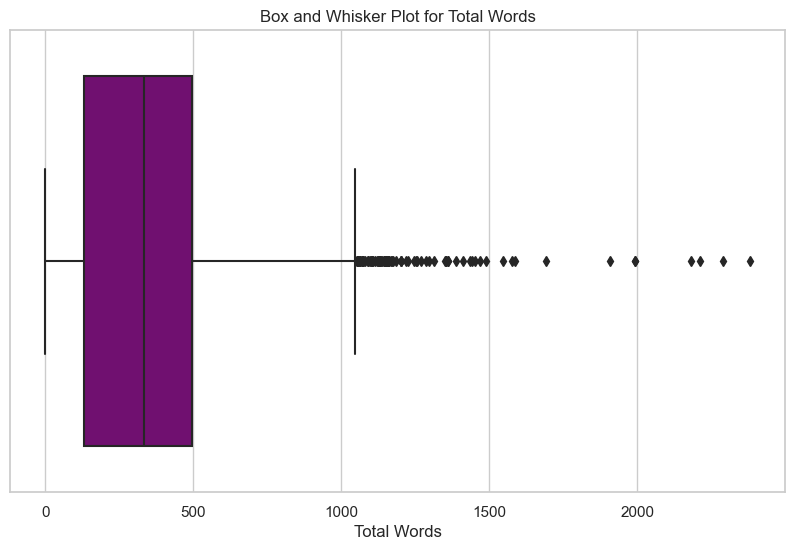

In [11]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a box and whisker plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df2['Total Words'], color='purple')
plt.title('Box and Whisker Plot for Total Words')
plt.xlabel('Total Words')
plt.show()

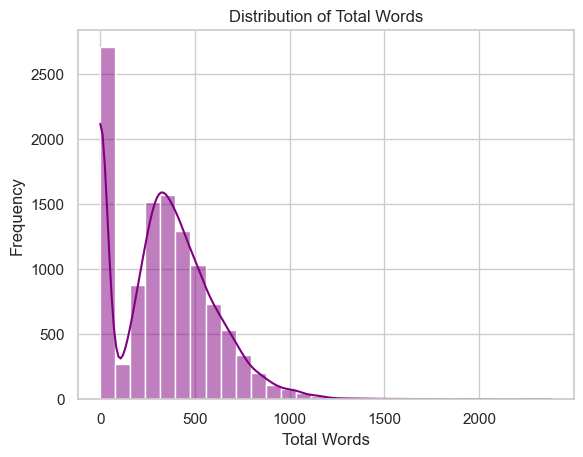

In [12]:
# Plot the histogram
sns.histplot(merged_df2['Total Words'], kde=True, color='purple', bins=30)

# Add a title and labels
plt.title('Distribution of Total Words')
plt.xlabel('Total Words')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [13]:
# Filter the DataFrame to include only rows where 'Peak Position' is 10 or less
filtered_df = merged_df2[merged_df2['Peak Position'] <= 10]

# Calculate mean
mean_total_words = filtered_df['Total Words'].mean()

# Calculate median
median_total_words = filtered_df['Total Words'].median()

# Calculate mode
mode_result = stats.mode(filtered_df['Total Words'])
mode_total_words = mode_result.mode.item()  # Extract the mode from the result

# Calculate variance
variance_total_words = np.var(filtered_df['Total Words'], ddof=1)

# Calculate standard deviation
std_deviation_total_words = np.std(filtered_df['Total Words'], ddof=1)

# Display the results
print(f"Mean: {mean_total_words}")
print(f"Median: {median_total_words}")
print(f"Mode: {mode_total_words}")
print(f"Variance: {variance_total_words}")
print(f"Standard Deviation: {std_deviation_total_words}")

Mean: 366.2063615205586
Median: 377.0
Mode: 0
Variance: 75441.62974210842
Standard Deviation: 274.66639718412665


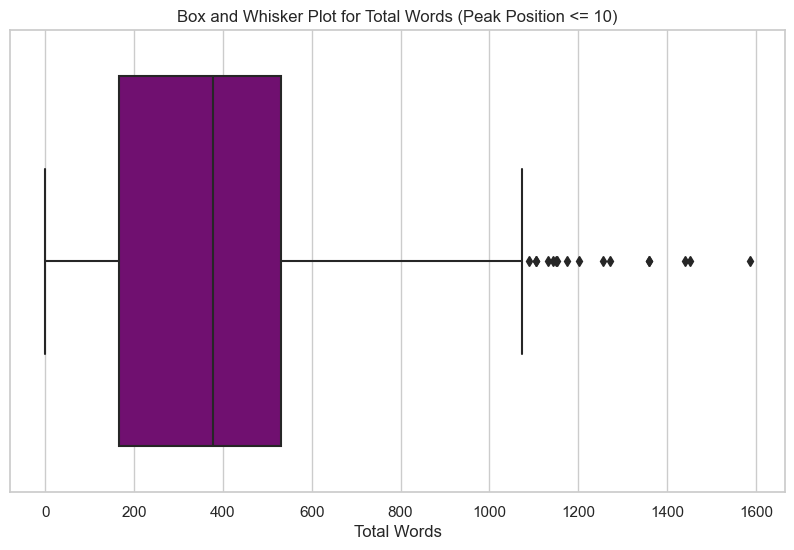

In [14]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a box and whisker plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df['Total Words'], color='purple')
plt.title('Box and Whisker Plot for Total Words (Peak Position <= 10)')
plt.xlabel('Total Words')
plt.show()

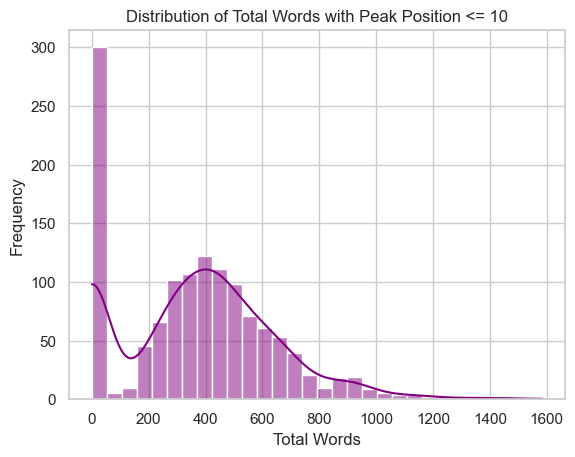

In [15]:
# Filter the DataFrame to include only rows where 'Peak Position' is 10 or less
filtered_df = merged_df2[merged_df2['Peak Position'] <= 10]

# Create a histogram to visualize the distribution
sns.histplot(filtered_df['Total Words'], kde=True, color='purple', bins=30)

# Add labels and title
plt.title('Distribution of Total Words with Peak Position <= 10')
plt.xlabel('Total Words')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [16]:
# Calculate mean
mean_total_words = merged_df2['Unique Words'].mean()

# Calculate median
median_total_words = merged_df2['Unique Words'].median()

# Calculate mode
mode_result = stats.mode(merged_df2['Unique Words'])
mode_total_words = mode_result.mode.item()  # Extract the mode from the result

# Calculate variance
variance_total_words = np.var(merged_df2['Unique Words'], ddof=1)

# Calculate standard deviation
std_deviation_total_words = np.std(merged_df2['Unique Words'], ddof=1)

# Display the results
print(f"Mean: {mean_total_words}")
print(f"Median: {median_total_words}")
print(f"Mode: {mode_total_words}")
print(f"Variance: {variance_total_words}")
print(f"Standard Deviation: {std_deviation_total_words}")

Mean: 135.8066643221382
Median: 123.0
Mode: 0
Variance: 12301.276871084097
Standard Deviation: 110.91112149412292


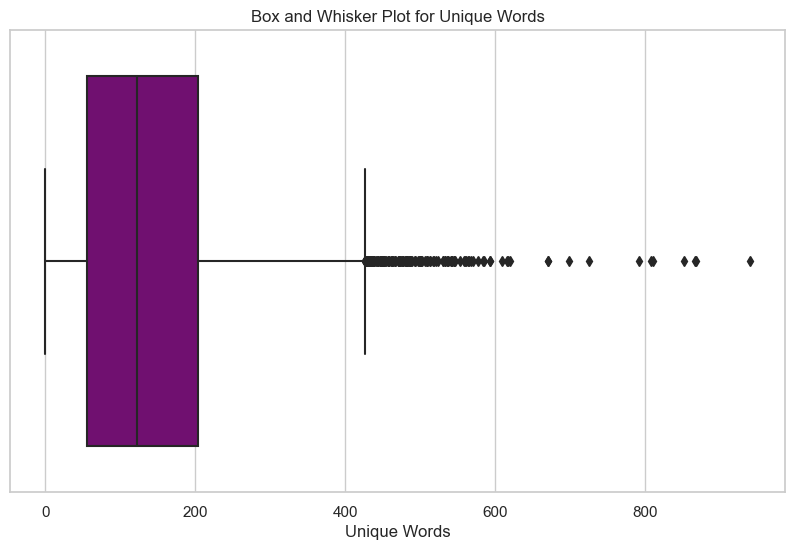

In [17]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a box and whisker plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df2['Unique Words'], color='purple')
plt.title('Box and Whisker Plot for Unique Words')
plt.xlabel('Unique Words')
plt.show()

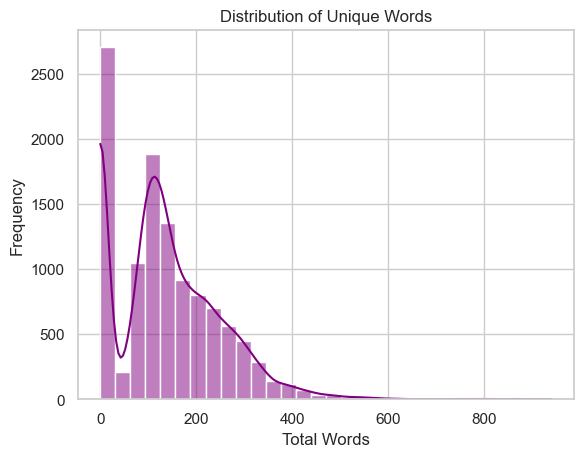

In [18]:
# Plot the histogram
sns.histplot(merged_df2['Unique Words'], kde=True, color='purple', bins=30)

# Add a title and labels
plt.title('Distribution of Unique Words')
plt.xlabel('Total Words')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [19]:
# Filter the DataFrame to include only rows where 'Peak Position' is 10 or less
filtered_df = merged_df2[merged_df2['Peak Position'] <= 10]

# Calculate mean
mean_total_words = filtered_df['Unique Words'].mean()

# Calculate median
median_total_words = filtered_df['Unique Words'].median()

# Calculate mode
mode_result = stats.mode(filtered_df['Unique Words'])
mode_total_words = mode_result.mode.item()  # Extract the mode from the result

# Calculate variance
variance_total_words = np.var(filtered_df['Unique Words'], ddof=1)

# Calculate standard deviation
std_deviation_total_words = np.std(filtered_df['Unique Words'], ddof=1)

# Display the results
print(f"Mean: {mean_total_words}")
print(f"Median: {median_total_words}")
print(f"Mode: {mode_total_words}")
print(f"Variance: {variance_total_words}")
print(f"Standard Deviation: {std_deviation_total_words}")

Mean: 148.58494957331266
Median: 139.0
Mode: 0
Variance: 13549.41533231497
Standard Deviation: 116.40195587839136


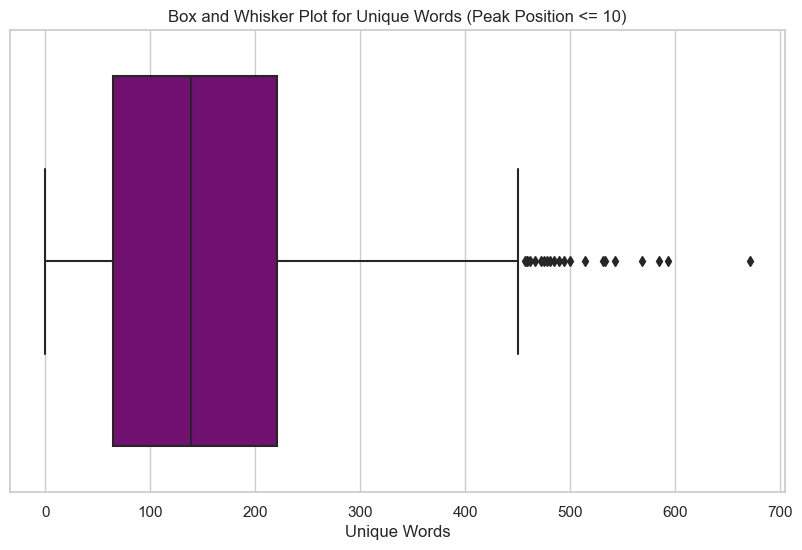

In [20]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a box and whisker plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df['Unique Words'], color='purple')
plt.title('Box and Whisker Plot for Unique Words (Peak Position <= 10)')
plt.xlabel('Unique Words')
plt.show()

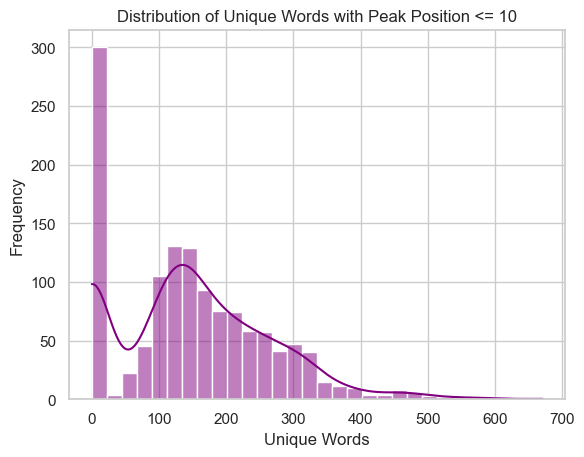

In [21]:
# Filter the DataFrame to include only rows where 'Peak Position' is 10 or less
filtered_df = merged_df2[merged_df2['Peak Position'] <= 10]

# Create a histogram to visualize the distribution
sns.histplot(filtered_df['Unique Words'], kde=True, color='purple', bins=30)

# Add labels and title
plt.title('Distribution of Unique Words with Peak Position <= 10')
plt.xlabel('Unique Words')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Correlation coefficient: 0.02071772402404862
R-squared value: 0.0004292240887366414
Chi-square statistic: 617884.1133958836
P-value: 5.880560354642098e-46


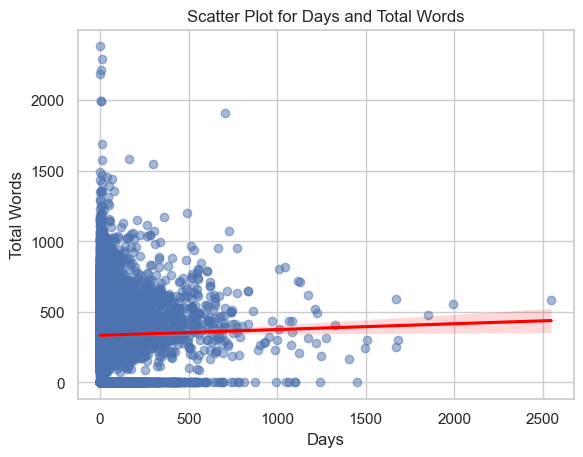

In [22]:
# Scatter plot for "Days" and "Total Words"
sns.regplot(x='Days', y='Total Words', data=merged_df2, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Scatter Plot for Days and Total Words')
plt.xlabel('Days')
plt.ylabel('Total Words')
plt.grid(True)

# Calculate R-squared
correlation_coefficient = merged_df2['Days'].corr(merged_df2['Total Words'])
r_squared = correlation_coefficient ** 2
print(f'Correlation coefficient: {correlation_coefficient}')
print(f'R-squared value: {r_squared}')

# Perform Chi-square test for independence
chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(merged_df2['Days'], merged_df2['Total Words']))
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')

# Show the plot
plt.show()

Correlation coefficient: -0.0035486259726674567
R-squared value: 1.2592746293890053e-05
Chi-square statistic: 297160.1737301599
P-value: 1.0


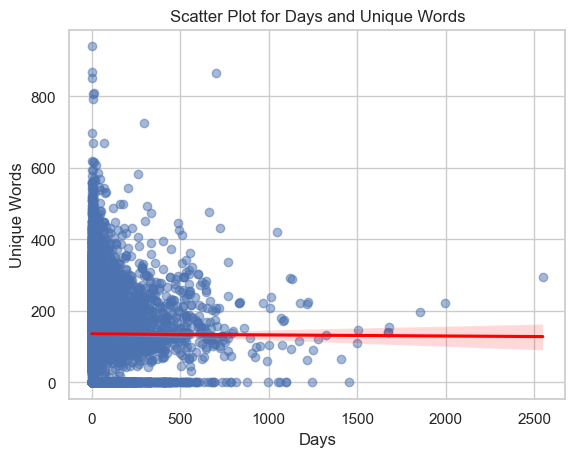

In [23]:
# Scatter plot for "Days" and "Total Words"
sns.regplot(x='Days', y='Unique Words', data=merged_df2, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Scatter Plot for Days and Unique Words')
plt.xlabel('Days')
plt.ylabel('Unique Words')
plt.grid(True)

# Calculate R-squared
correlation_coefficient = merged_df2['Days'].corr(merged_df2['Unique Words'])
r_squared = correlation_coefficient ** 2
print(f'Correlation coefficient: {correlation_coefficient}')
print(f'R-squared value: {r_squared}')

# Perform Chi-square test for independence
chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(merged_df2['Days'], merged_df2['Unique Words']))
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')

# Show the plot
plt.show()

Correlation coefficient: 0.02275436251104704
R-squared value: 0.000517761013284143
Chi-square statistic: 11417778.615857622
P-value: 0.0


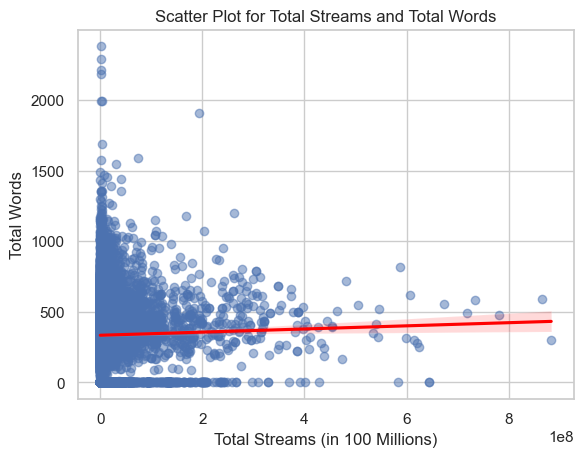

In [24]:
# Scatter plot for "Days" and "Total Words"
sns.regplot(x='Total Streams', y='Total Words', data=merged_df2, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Scatter Plot for Total Streams and Total Words')
plt.xlabel('Total Streams (in 100 Millions)')
plt.ylabel('Total Words')
plt.grid(True)

# Calculate R-squared
correlation_coefficient = merged_df2['Total Streams'].corr(merged_df2['Total Words'])
r_squared = correlation_coefficient ** 2
print(f'Correlation coefficient: {correlation_coefficient}')
print(f'R-squared value: {r_squared}')

# Perform Chi-square test for independence
chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(merged_df2['Total Streams'], merged_df2['Total Words']))
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')

# Show the plot
plt.show()

Correlation coefficient: 0.003491576970067178
R-squared value: 1.2191109737903496e-05
Chi-square statistic: 5796506.008547383
P-value: 0.0


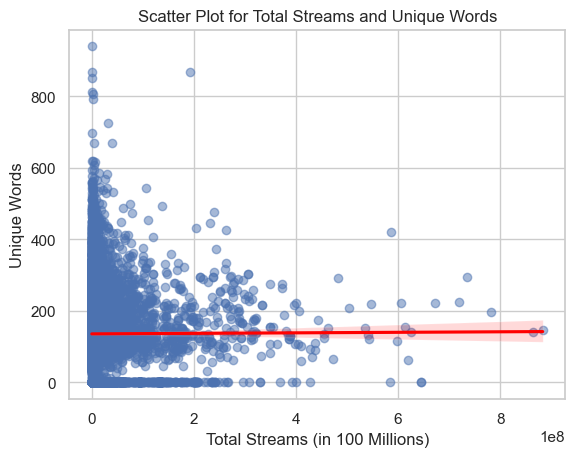

In [25]:
# Scatter plot for "Days" and "Total Words"
sns.regplot(x='Total Streams', y='Unique Words', data=merged_df2, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Scatter Plot for Total Streams and Unique Words')
plt.xlabel('Total Streams (in 100 Millions)')
plt.ylabel('Unique Words')
plt.grid(True)

# Calculate correlation coefficient and R-squared
correlation_coefficient = merged_df2['Total Streams'].corr(merged_df2['Unique Words'])
r_squared = correlation_coefficient ** 2
print(f'Correlation coefficient: {correlation_coefficient}')
print(f'R-squared value: {r_squared}')

# Perform Chi-square test for independence
chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(merged_df2['Total Streams'], merged_df2['Unique Words']))
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')

# Show the plot
plt.show()

In [44]:
# Group by 'Artist Name' and calculate the sum of 'Total Streams' for each artist
artist_total_streams = merged_df2.groupby('Artist Name')['Total Streams'].sum().reset_index()

# Merge the total streams back into the original DataFrame
merged_df2 = pd.merge(merged_df2, artist_total_streams, on='Artist Name', how='left')

# Rename the new column
merged_df2 = merged_df2.rename(columns={'Total Streams_x': 'Total Streams', 'Total Streams_y': 'Artist Total Streams'})

# Display the updated DataFrame
display(merged_df2.head())

KeyError: 'Column not found: Total Streams'

In [27]:
# Group by 'Artist Name' and find the maximum 'Peak Position' for each artist
artist_peak_position = merged_df2.groupby('Artist Name')['Peak Position'].min().reset_index()

# Merge the highest peak position back into the original DataFrame
merged_df2 = pd.merge(merged_df2, artist_peak_position, on='Artist Name', how='left')

# Rename the new column
merged_df2 = merged_df2.rename(columns={'Peak Position_x': 'Peak Position', 'Peak Position_y': 'Artist Highest Peak Position'})

# Display the updated DataFrame
display(merged_df2.head())

Position    Artist Name                                   Song Name  Days  \
0         1   Post Malone   Sunflower  SpiderMan: Into the SpiderVerse  1506   
1         2    Juice WRLD                                 Lucid Dreams  1673   
2         3  Lil Uzi Vert                                XO TOUR Llif3  1853   
3         4       J. Cole                               No Role Modelz  2547   
4         5   Post Malone                                     rockstar  1223   

   Top 10 (xTimes)  Peak Position Peak Position (xTimes)  Peak Streams  \
0              302              1                  (x29)       2118242   
1              178              1                  (x20)       2127668   
2              212              1                   (x4)       1660502   
3                6              7                      0        659366   
4              186              1                 (x124)       2905678   

   Total Streams  Unnamed: 0  \
0      883369738         0.0   
1      864832399         1.0   
2      781153024         2.0   
3      734857487         3.0   
4      718865961         4.0   

                                              Lyrics  Total Words  \
0  [Swae Lee:]\nAyy, ayy, ayy, ayy (ooh)\nOoh, oo...          301   
1  Enviyon on the mix\nNo, no, no, no\nNo-no, no,...          589   
2  Are you alright?\nI'm alright, I'm quite alrig...          478   
3  First things first rest in peace Uncle Phil\nF...          582   
4  [Post Malone:]\nHahahahaha\nTank God\n\nAyy, I...          490   

   Unique Words  Artist Total Streams  Artist Highest Peak Position  
0           147            7400199432                             1  
1           142            4857996474                             1  
2           198            3196916749                             1  
3           294            2663931014                             1  
4           226            7400199432                             1

In [28]:
# Group by 'Artist Name' and calculate the average 'Peak Position' for each artist
artist_avg_peak_position = merged_df2.groupby('Artist Name')['Peak Position'].mean().reset_index()

# Merge the average peak position back into the original DataFrame
merged_df2 = pd.merge(merged_df2, artist_avg_peak_position, on='Artist Name', how='left')

# Rename the new column
merged_df2 = merged_df2.rename(columns={'Peak Position_x': 'Peak Position', 'Peak Position_y': 'Average Peak Position of Songs'})

# Display the updated DataFrame
display(merged_df2.head())

Position    Artist Name                                   Song Name  Days  \
0         1   Post Malone   Sunflower  SpiderMan: Into the SpiderVerse  1506   
1         2    Juice WRLD                                 Lucid Dreams  1673   
2         3  Lil Uzi Vert                                XO TOUR Llif3  1853   
3         4       J. Cole                               No Role Modelz  2547   
4         5   Post Malone                                     rockstar  1223   

   Top 10 (xTimes)  Peak Position Peak Position (xTimes)  Peak Streams  \
0              302              1                  (x29)       2118242   
1              178              1                  (x20)       2127668   
2              212              1                   (x4)       1660502   
3                6              7                      0        659366   
4              186              1                 (x124)       2905678   

   Total Streams  Unnamed: 0  \
0      883369738         0.0   
1      864832399         1.0   
2      781153024         2.0   
3      734857487         3.0   
4      718865961         4.0   

                                              Lyrics  Total Words  \
0  [Swae Lee:]\nAyy, ayy, ayy, ayy (ooh)\nOoh, oo...          301   
1  Enviyon on the mix\nNo, no, no, no\nNo-no, no,...          589   
2  Are you alright?\nI'm alright, I'm quite alrig...          478   
3  First things first rest in peace Uncle Phil\nF...          582   
4  [Post Malone:]\nHahahahaha\nTank God\n\nAyy, I...          490   

   Unique Words  Artist Total Streams  Artist Highest Peak Position  \
0           147            7400199432                             1   
1           142            4857996474                             1   
2           198            3196916749                             1   
3           294            2663931014                             1   
4           226            7400199432                             1   

   Average Peak Position of Songs  
0                       29.971014  
1                       31.923077  
2                       29.589041  
3                       25.666667  
4                       29.971014

Correlation coefficient: -0.5681870820763318
R-squared value: 0.3228365602384163
Chi-square statistic: 8587370.000000002
P-value: 0.0


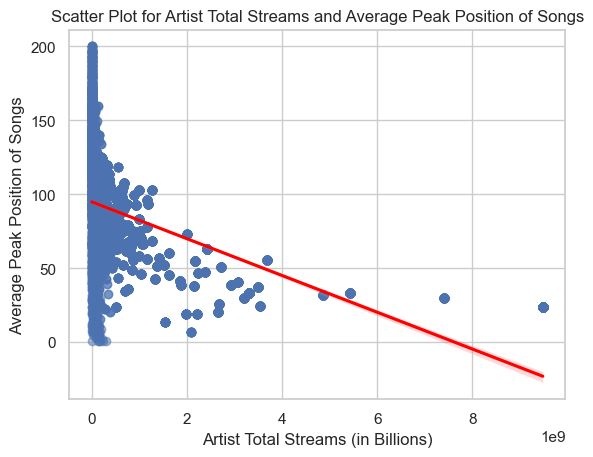

In [29]:
# Scatter plot for "Artist Total Streams" and "Average Peak Position of Songs"
sns.regplot(x='Artist Total Streams', y='Average Peak Position of Songs', data=merged_df2, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Scatter Plot for Artist Total Streams and Average Peak Position of Songs')
plt.xlabel('Artist Total Streams (in Billions)')
plt.ylabel('Average Peak Position of Songs')
plt.grid(True)

# Calculate correlation coefficient and R-squared
correlation_coefficient = merged_df2['Artist Total Streams'].corr(merged_df2['Average Peak Position of Songs'])
r_squared = correlation_coefficient ** 2
print(f'Correlation coefficient: {correlation_coefficient}')
print(f'R-squared value: {r_squared}')

# Perform Chi-square test for independence
chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(merged_df2['Artist Total Streams'], merged_df2['Average Peak Position of Songs']))
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')

# Show the plot
plt.show()

In [30]:
# Group by 'Artist Name' and 'Song Name', calculate the sum of 'Total Streams' for each group, and reset the index
song_total_streams = merged_df2.groupby(['Artist Name', 'Song Name'])['Total Streams'].sum().reset_index()

# Merge the calculated total streams back to the original DataFrame
merged_df2 = pd.merge(merged_df2, song_total_streams, on=['Artist Name', 'Song Name'], how='left', suffixes=('', '_Song'))

# Calculate the number of times each song appears in the DataFrame
song_counts = merged_df2['Song Name'].value_counts()

# Create a new column 'Average Total Streams of Songs' by dividing 'Total Streams' by the corresponding song count
merged_df2['Average Total Streams of Songs'] = merged_df2['Total Streams'] / merged_df2['Song Name'].map(song_counts)

# Drop the extra column 'Total Streams_Song'
merged_df2 = merged_df2.drop(columns=['Total Streams_Song'])

# Display the updated DataFrame
display(merged_df2.head())

Position    Artist Name                                   Song Name  Days  \
0         1   Post Malone   Sunflower  SpiderMan: Into the SpiderVerse  1506   
1         2    Juice WRLD                                 Lucid Dreams  1673   
2         3  Lil Uzi Vert                                XO TOUR Llif3  1853   
3         4       J. Cole                               No Role Modelz  2547   
4         5   Post Malone                                     rockstar  1223   

   Top 10 (xTimes)  Peak Position Peak Position (xTimes)  Peak Streams  \
0              302              1                  (x29)       2118242   
1              178              1                  (x20)       2127668   
2              212              1                   (x4)       1660502   
3                6              7                      0        659366   
4              186              1                 (x124)       2905678   

   Total Streams  Unnamed: 0  \
0      883369738         0.0   
1      864832399         1.0   
2      781153024         2.0   
3      734857487         3.0   
4      718865961         4.0   

                                              Lyrics  Total Words  \
0  [Swae Lee:]\nAyy, ayy, ayy, ayy (ooh)\nOoh, oo...          301   
1  Enviyon on the mix\nNo, no, no, no\nNo-no, no,...          589   
2  Are you alright?\nI'm alright, I'm quite alrig...          478   
3  First things first rest in peace Uncle Phil\nF...          582   
4  [Post Malone:]\nHahahahaha\nTank God\n\nAyy, I...          490   

   Unique Words  Artist Total Streams  Artist Highest Peak Position  \
0           147            7400199432                             1   
1           142            4857996474                             1   
2           198            3196916749                             1   
3           294            2663931014                             1   
4           226            7400199432                             1   

   Average Peak Position of Songs  Average Total Streams of Songs  
0                       29.971014                     883369738.0  
1                       31.923077                     432416199.5  
2                       29.589041                     781153024.0  
3                       25.666667                     734857487.0  
4                       29.971014                     718865961.0

In [31]:
# Create a new column 'Count of Top 10 Peaks' by checking if 'Peak Position' is less than or equal to 10
merged_df2['Count of Top 10 Peaks'] = (merged_df2['Peak Position'] <= 10).groupby(merged_df2['Artist Name']).transform('sum')

# Display the updated DataFrame
display(merged_df2.head())

Position    Artist Name                                   Song Name  Days  \
0         1   Post Malone   Sunflower  SpiderMan: Into the SpiderVerse  1506   
1         2    Juice WRLD                                 Lucid Dreams  1673   
2         3  Lil Uzi Vert                                XO TOUR Llif3  1853   
3         4       J. Cole                               No Role Modelz  2547   
4         5   Post Malone                                     rockstar  1223   

   Top 10 (xTimes)  Peak Position Peak Position (xTimes)  Peak Streams  \
0              302              1                  (x29)       2118242   
1              178              1                  (x20)       2127668   
2              212              1                   (x4)       1660502   
3                6              7                      0        659366   
4              186              1                 (x124)       2905678   

   Total Streams  Unnamed: 0  \
0      883369738         0.0   
1      864832399         1.0   
2      781153024         2.0   
3      734857487         3.0   
4      718865961         4.0   

                                              Lyrics  Total Words  \
0  [Swae Lee:]\nAyy, ayy, ayy, ayy (ooh)\nOoh, oo...          301   
1  Enviyon on the mix\nNo, no, no, no\nNo-no, no,...          589   
2  Are you alright?\nI'm alright, I'm quite alrig...          478   
3  First things first rest in peace Uncle Phil\nF...          582   
4  [Post Malone:]\nHahahahaha\nTank God\n\nAyy, I...          490   

   Unique Words  Artist Total Streams  Artist Highest Peak Position  \
0           147            7400199432                             1   
1           142            4857996474                             1   
2           198            3196916749                             1   
3           294            2663931014                             1   
4           226            7400199432                             1   

   Average Peak Position of Songs  Average Total Streams of Songs  \
0                       29.971014                     883369738.0   
1                       31.923077                     432416199.5   
2                       29.589041                     781153024.0   
3                       25.666667                     734857487.0   
4                       29.971014                     718865961.0   

   Count of Top 10 Peaks  
0                     37  
1                     31  
2                     28  
3                     33  
4                     37

In [32]:
#just done to verify code
post_malone_rows = merged_df2[merged_df2['Artist Name'].str.strip() == 'Post Malone']
pd.set_option('display.max_columns', None)  # Show all columns
display(post_malone_rows)
# Save the filtered DataFrame to a CSV file
post_malone_rows.to_csv('post_malone_filtered_rows.csv', index=False)

Position   Artist Name                                   Song Name  \
0             1  Post Malone   Sunflower  SpiderMan: Into the SpiderVerse   
4             5  Post Malone                                     rockstar   
12           12  Post Malone                                      Circles   
15           15  Post Malone                              Congratulations   
16           16  Post Malone                                 I Fall Apart   
...         ...           ...                                         ...   
6125       5921  Post Malone                                      Patient   
6844       6632  Post Malone                                        Leave   
8865       8606  Post Malone                                    Too Young   
9658       9390  Post Malone                            Waiting For Never   
10875     10589  Post Malone                                         Cold   

       Days  Top 10 (xTimes)  Peak Position Peak Position (xTimes)  \
0      1506              302              1                  (x29)   
4      1223              186              1                 (x124)   
12     1172              163              1                  (x38)   
15     1215              136              5                      0   
16     1278              132              2                  (x14)   
...     ...              ...            ...                    ...   
6125      8                0            136                      0   
6844      6                0            163                      0   
8865      2                0            180                      0   
9658      1                0            176                      0   
10875     1                0            198                      0   

       Peak Streams  Total Streams  Unnamed: 0  \
0           2118242      883369738         0.0   
4           2905678      718865961         4.0   
12          3441328      598521764        11.0   
15          1263208      546036924        14.0   
16          1275320      543144261        15.0   
...             ...            ...         ...   
6125         199976        1421750      5920.0   
6844         175844         960943      6631.0   
8865         164875         328664      8605.0   
9658         266579         266579      9389.0   
10875        154134         154134     10588.0   

                                                  Lyrics  Total Words  \
0      [Swae Lee:]\nAyy, ayy, ayy, ayy (ooh)\nOoh, oo...          301   
4      [Post Malone:]\nHahahahaha\nTank God\n\nAyy, I...          490   
12     Oh, oh, oh-oh\nOh, oh, oh-oh\nOh, oh, oh-oh, o...          313   
15     Mm-mmm\nYah, yah\nMm-mmm\nYah (hey)\n\n[Post M...          522   
16     Ooh I fall apart\nOoh yeah, mmm...\n\nShe told...          318   
...                                                  ...          ...   
6125   Yeah, yeah, yeah...\n\nI know my wrist be danc...          390   
6844   She said, "Love me," so I love her\nShe said, ...          274   
8865   I don't wanna die too young\nYeah, too young, ...          393   
9658   Should've seen the signs so I guess I deserved...          347   
10875  Yeah, my wrist so cold and my ice on froze\nAn...          467   

       Unique Words  Artist Total Streams  Artist Highest Peak Position  \
0               147            7400199432                             1   
4               226            7400199432                             1   
12              115            7400199432                             1   
15              220            7400199432                             1   
16              122            7400199432                             1   
...             ...                   ...                           ...   
6125            183            7400199432                             1   
6844            102            7400199432                             1   
8865            155            7400199432                             1   
9658         

Correlation coefficient: 0.9228227539723971
R-squared value: 0.8516018352491993
Chi-square statistic: 352594.00000000006
P-value: 0.0


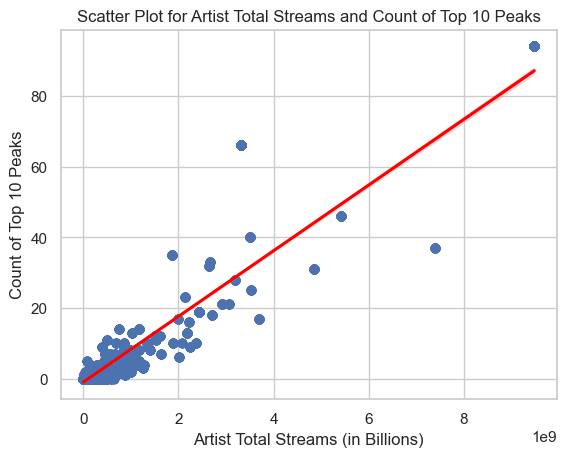

In [33]:
# Scatter plot for "Artist Total Streams" and "Average Peak Position of Songs"
sns.regplot(x='Artist Total Streams', y='Count of Top 10 Peaks', data=merged_df2, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Scatter Plot for Artist Total Streams and Count of Top 10 Peaks')
plt.xlabel('Artist Total Streams (in Billions)')
plt.ylabel('Count of Top 10 Peaks')
plt.grid(True)

# Calculate R-squared
correlation_coefficient = merged_df2['Artist Total Streams'].corr(merged_df2['Count of Top 10 Peaks'])
r_squared = correlation_coefficient ** 2
print(f'Correlation coefficient: {correlation_coefficient}')
print(f'R-squared value: {r_squared}')

# Perform Chi-square test for independence
chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(merged_df2['Artist Total Streams'], merged_df2['Count of Top 10 Peaks']))
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')

# Show the plot
plt.show()

In [34]:
#proof of concept for lyric word cloud, will need to be edited to remove unnecesary words
from collections import Counter

# Combine all lyrics into a single string
all_lyrics = ' '.join(merged_df2['Lyrics'].dropna())

# Tokenize the lyrics into words
words = all_lyrics.split()

# Count the frequency of each word
word_counts = Counter(words)

# Display the unique words and their counts
unique_words_counts = list(word_counts.items())
print(unique_words_counts)

[('[Swae', 89), ('Lee:]', 88), ('Ayy,', 742), ('ayy,', 654), ('ayy', 1046), ('(ooh)', 145), ('Ooh,', 1500), ('ooh,', 1372), ('ohh', 78), ('Needless', 2), ('to', 58973), ('say,', 945), ('I', 146737), ('keep', 5723), ('in', 42551), ('check', 933), ('She', 5553), ('was', 11897), ('a', 73921), ('bad-bad,', 2), ('nevertheless', 3), ('(yeah)', 877), ("Callin'", 45), ('it', 46470), ('quits', 16), ('now,', 1532), ('baby,', 2894), ("I'm", 47462), ('wreck', 86), ('(wreck)', 2), ('Crash', 22), ('at', 8674), ('my', 55416), ('place,', 125), ("you're", 6885), ("keepin'", 192), ("Thinkin'", 133), ('bad', 2656), ('way,', 873), ("losin'", 163), ('your', 26106), ('grip', 122), ("Screamin'", 16), ('face,', 406), ("don't", 22953), ('trip', 247), ('Someone', 187), ('took', 1513), ('big', 2146), ('L,', 42), ('know', 22513), ('how', 5934), ('that', 34458), ('felt', 605), ("Lookin'", 258), ('you', 90535), ('sideways,', 16), ('party', 823), ('on', 39080), ('tilt', 5), ('Ooh-ooh', 38), ('Some', 478), ('things',

In [35]:
# Filter out specific words
filtered_words_counts = [(word, count) for word, count in unique_words_counts if word.lower() not in ['bitch,', 'nigga,','the', 'of', 'and', 'a', 'to', 'in', 'is', 'you', 'that', 'it', 'he', 'was', 'for', 'on', 'are', 'as', 'with', 'his', 'they', 'I', 'at', 'be', 'this', 'have', 'from', '4r5e', '5h1t', '5hit', 'a55', 'anal', 'anus', 'ar5e', 'arrse', 'arse', 'ass', 'ass-fucker', 'asses', 'assfucker', 'assfukka', 'asshole', 'assholes', 'asswhole', 'a_s_s', 'b!tch', 'b00bs', 'b17ch', 'b1tch', 'ballbag', 'balls', 'ballsack', 'bastard', 'beastial', 'beastiality', 'bellend', 'bestial', 'bestiality', 'bi+ch', 'biatch', 'bitch', 'bitcher', 'bitchers', 'bitches', 'bitchin', 'bitching', 'bloody', 'blow job', 'blowjob', 'blowjobs', 'boiolas', 'bollock', 'bollok', 'boner', 'boob', 'boobs', 'booobs', 'boooobs', 'booooobs', 'booooooobs', 'breasts', 'buceta', 'bugger', 'bum', 'bunny fucker', 'butt', 'butthole', 'buttmuch', 'buttplug', 'c0ck', 'c0cksucker', 'carpet muncher', 'cawk', 'chink', 'cipa', 'cl1t', 'clit', 'clitoris', 'clits', 'cnut', 'cock', 'cock-sucker', 'cockface', 'cockhead', 'cockmunch', 'cockmuncher', 'cocks', 'cocksuck', 'cocksucked', 'cocksucker', 'cocksucking', 'cocksucks', 'cocksuka', 'cocksukka', 'cok', 'cokmuncher', 'coksucka', 'coon', 'cox', 'crap', 'cum', 'cummer', 'cumming', 'cums', 'cumshot', 'cunilingus', 'cunillingus', 'cunnilingus', 'cunt', 'cuntlick ', 'cuntlicker', 'cuntlicking', 'cunts', 'cyalis', 'cyberfuc', 'cyberfuck', 'cyberfucked', 'cyberfucker', 'cyberfuckers', 'cyberfucking', 'd1ck', 'damn', 'dick', 'dickhead', 'dildo', 'dildos', 'dink', 'dinks', 'dirsa', 'dlck', 'dog-fucker', 'doggin', 'dogging', 'donkeyribber', 'doosh', 'duche', 'dyke', 'ejaculate', 'ejaculated', 'ejaculates', 'ejaculating', 'ejaculatings', 'ejaculation', 'ejakulate', 'f u c k', 'f u c k e r', 'f4nny', 'fag', 'fagging', 'faggitt', 'faggot', 'faggs', 'fagot', 'fagots', 'fags', 'fanny', 'fannyflaps', 'fannyfucker', 'fanyy', 'fatass', 'fcuk', 'fcuker', 'fcuking', 'feck', 'fecker', 'felching', 'fellate', 'fellatio', 'fingerfuck', 'fingerfucked', 'fingerfucker', 'fingerfuckers', 'fingerfucking', 'fingerfucks', 'fistfuck', 'fistfucked', 'fistfucker', 'fistfuckers', 'fistfucking', 'fistfuckings', 'fistfucks', 'flange', 'fook', 'fooker', 'fuck', 'fucka', 'fucked', 'fucker', 'fuckers', 'fuckhead', 'fuckheads', 'fuckin', 'fucking', 'fuckings', 'fuckingshitmotherfucker', 'fuckme', 'fucks', 'fuckwhit', 'fuckwit', 'fudge packer', 'fudgepacker', 'fuk', 'fuker', 'fukker', 'fukkin', 'fuks',  'fukwhit', 'fukwit', 'fux', 'fux0r', 'f_u_c_k', 'gangbang', 'gangbanged', 'gangbangs', 'gaylord', 'gaysex', 'goatse', 'god-dam', 'god-damned', 'goddamn', 'goddamned', 'hardcoresex', 'hell', 'heshe', 'hoar', 'hoare', 'hoer', 'homo', 'hore', 'horniest', 'horny', 'hotsex', 'jack-off', 'jackoff', 'jap', 'jerk-off', 'jism', 'jiz', 'jizm', 'jizz', 'kawk', 'knob', 'knobead', 'knobed', 'knobend', 'knobhead', 'knobjocky', 'knobjokey', 'kock', 'kondum', 'kondums', 'kum', 'kummer', 'kumming', 'kums', 'kunilingus', 'l3i+ch', 'l3itch', 'labia', 'lmfao', 'lust', 'lusting', 'm0f0', 'm0fo', 'm45terbate', 'ma5terb8', 'ma5terbate', 'masochist', 'master-bate', 'masterb8', 'masterbat*', 'masterbat3', 'masterbate', 'masterbation', 'masterbations', 'masturbate', 'mo-fo', 'mof0', 'mofo', 'mothafuck', 'mothafucka', 'mothafuckas', 'mothafuckaz', 'mothafucked', 'mothafucker', 'mothafuckers', 'mothafuckin', 'mothafucking', 'mothafuckings', 'mothafucks', 'mother fucker', 'motherfuck', 'motherfucked', 'motherfucker', 'motherfuckers', 'motherfuckin', 'motherfucking', 'motherfuckings', 'motherfuckka', 'motherfucks', 'muff', 'mutha', 'muthafecker', 'muthafuckker', 'muther', 'mutherfucker', 'n1gga', 'n1gger', 'nazi', 'nigg3r', 'nigg4h', 'nigga', 'niggah', 'niggas', 'niggaz', 'nigger', 'niggers', 'nob', 'nob jokey', 'nobhead', 'nobjocky','nobjokey','numbnuts','nutsack','orgasim','orgasims','orgasm','orgasms','p0rn','pawn','pecker','penis','penisfucker','phonesex','phuck','phuk','phuked','phuking','phukked','phukking','phuks','phuq','pigfucker','pimpis','piss','pissed','pisser','pissers','pisses','pissflaps','pissin','pissing','pissoff','poop','porn','porno','pornography','pornos','prick','pricks','pron','pube','pusse','pussi','pussies','pussy','pussys','rectum','retard','rimjaw','rimming','s hit','s.o.b.','sadist','schlong','screwing','scroat','scrote','scrotum','semen','sex', 'sh!+', 'sh!t', 'sh1t', 'shag', 'shagger', 'shaggin', 'shagging', 'shemale', 'shi+', 'shit', 'shitdick', 'shite', 'shited', 'shitey', 'shitfuck', 'shitfull', 'shithead', 'shiting', 'shitings', 'shits', 'shitted', 'shitter', 'shitters', 'shitting', 'shittings', 'shitty', 'skank', 'slut', 'sluts', 'smegma', 'smut', 'snatch', 'son-of-a-bitch', 'spac', 'spunk', 's_h_i_t', 't1tt1e5', 't1tties', 'teets', 'teez', 'testical', 'testicle', 'tit', 'titfuck', 'tits', 'titt', 'tittie5', 'tittiefucker', 'titties', 'tittyfuck', 'tittywank', 'titwank', 'tosser', 'turd', 'tw4t', 'twat', 'twathead', 'twatty', 'twunt', 'twunter', 'v14gra', 'v1gra', 'vagina', 'viagra', 'vulva', 'w00se', 'wang', 'wank', 'wanker', 'wanky', 'whoar', 'whore', 'willies', 'xrated', 'xxx']]

# Display the filtered list
print(filtered_words_counts)

[('[Swae', 89), ('Lee:]', 88), ('Ayy,', 742), ('ayy,', 654), ('ayy', 1046), ('(ooh)', 145), ('Ooh,', 1500), ('ooh,', 1372), ('ohh', 78), ('Needless', 2), ('say,', 945), ('I', 146737), ('keep', 5723), ('check', 933), ('She', 5553), ('bad-bad,', 2), ('nevertheless', 3), ('(yeah)', 877), ("Callin'", 45), ('quits', 16), ('now,', 1532), ('baby,', 2894), ("I'm", 47462), ('wreck', 86), ('(wreck)', 2), ('Crash', 22), ('my', 55416), ('place,', 125), ("you're", 6885), ("keepin'", 192), ("Thinkin'", 133), ('bad', 2656), ('way,', 873), ("losin'", 163), ('your', 26106), ('grip', 122), ("Screamin'", 16), ('face,', 406), ("don't", 22953), ('trip', 247), ('Someone', 187), ('took', 1513), ('big', 2146), ('L,', 42), ('know', 22513), ('how', 5934), ('felt', 605), ("Lookin'", 258), ('sideways,', 16), ('party', 823), ('tilt', 5), ('Ooh-ooh', 38), ('Some', 478), ('things', 2209), ('just', 17674), ("can't", 9454), ('refuse', 54), ('wanna', 10141), ('ride', 1636), ('me', 53784), ('like', 28911), ('cruise', 59

[('[Swae', 15), ('Lee:]', 12), ('Ayy,', 102), ('ayy,', 115), ('ayy', 145), ('(ooh)', 23), ('Ooh,', 235), ('ooh,', 200), ('ohh', 4), ('Needless', 2), ('to', 7354), ('say,', 118), ('I', 19023), ('keep', 715), ('in', 5401), ('check', 73), ('She', 682), ('was', 1529), ('a', 8488), ('bad-bad,', 2), ('nevertheless', 2), ('(yeah)', 116), ("Callin'", 9), ('it', 5645), ('quits', 3), ('now,', 199), ('baby,', 338), ("I'm", 6181), ('wreck', 11), ('(wreck)', 2), ('Crash', 7), ('at', 1178), ('my', 7432), ('place,', 14), ("you're", 799), ("keepin'", 20), ("Thinkin'", 24), ('bad', 408), ('way,', 83), ("losin'", 18), ('your', 3143), ('grip', 24), ("Screamin'", 2), ('face,', 53), ("don't", 2964), ('trip', 35), ('Someone', 32), ('took', 208), ('big', 245), ('L,', 8), ('know', 2931), ('how', 734), ('that', 4570), ('felt', 74), ("Lookin'", 39), ('you', 12037), ('sideways,', 5), ('party', 123), ('on', 4877), ('tilt', 2), ('Ooh-ooh', 3), ('Some', 61), ('things', 273), ('just', 2031), ("can't", 1296), ('refus

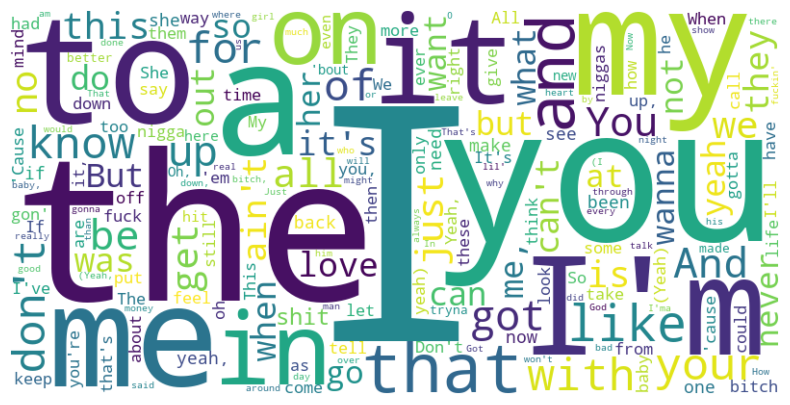

In [36]:
# Filter songs with 'Peak Position' <= 10
popular_songs_df = merged_df2[merged_df2['Peak Position'] <= 10]

# Combine lyrics of popular songs into a single string
all_lyrics_popular_songs = ' '.join(popular_songs_df['Lyrics'].dropna())

# Tokenize the lyrics into words
words_popular_songs = all_lyrics_popular_songs.split()

# Count the frequency of each word
word_counts_popular_songs = Counter(words_popular_songs)

# Display the unique words and their counts
unique_words_counts_popular_songs = list(word_counts_popular_songs.items())
print(unique_words_counts_popular_songs)

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts_popular_songs)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
# Filter out specific words
popular_filtered_words_counts = [(word, count) for word, count in unique_words_counts_popular_songs if word.lower() not in ['bitch,', 'nigga,','the', 'of', 'and', 'a', 'to', 'in', 'is', 'you', 'that', 'it', 'he', 'was', 'for', 'on', 'are', 'as', 'with', 'his', 'they', 'I', 'at', 'be', 'this', 'have', 'from', '4r5e', '5h1t', '5hit', 'a55', 'anal', 'anus', 'ar5e', 'arrse', 'arse', 'ass', 'ass-fucker', 'asses', 'assfucker', 'assfukka', 'asshole', 'assholes', 'asswhole', 'a_s_s', 'b!tch', 'b00bs', 'b17ch', 'b1tch', 'ballbag', 'balls', 'ballsack', 'bastard', 'beastial', 'beastiality', 'bellend', 'bestial', 'bestiality', 'bi+ch', 'biatch', 'bitch', 'bitcher', 'bitchers', 'bitches', 'bitchin', 'bitching', 'bloody', 'blow job', 'blowjob', 'blowjobs', 'boiolas', 'bollock', 'bollok', 'boner', 'boob', 'boobs', 'booobs', 'boooobs', 'booooobs', 'booooooobs', 'breasts', 'buceta', 'bugger', 'bum', 'bunny fucker', 'butt', 'butthole', 'buttmuch', 'buttplug', 'c0ck', 'c0cksucker', 'carpet muncher', 'cawk', 'chink', 'cipa', 'cl1t', 'clit', 'clitoris', 'clits', 'cnut', 'cock', 'cock-sucker', 'cockface', 'cockhead', 'cockmunch', 'cockmuncher', 'cocks', 'cocksuck', 'cocksucked', 'cocksucker', 'cocksucking', 'cocksucks', 'cocksuka', 'cocksukka', 'cok', 'cokmuncher', 'coksucka', 'coon', 'cox', 'crap', 'cum', 'cummer', 'cumming', 'cums', 'cumshot', 'cunilingus', 'cunillingus', 'cunnilingus', 'cunt', 'cuntlick ', 'cuntlicker', 'cuntlicking', 'cunts', 'cyalis', 'cyberfuc', 'cyberfuck', 'cyberfucked', 'cyberfucker', 'cyberfuckers', 'cyberfucking', 'd1ck', 'damn', 'dick', 'dickhead', 'dildo', 'dildos', 'dink', 'dinks', 'dirsa', 'dlck', 'dog-fucker', 'doggin', 'dogging', 'donkeyribber', 'doosh', 'duche', 'dyke', 'ejaculate', 'ejaculated', 'ejaculates', 'ejaculating', 'ejaculatings', 'ejaculation', 'ejakulate', 'f u c k', 'f u c k e r', 'f4nny', 'fag', 'fagging', 'faggitt', 'faggot', 'faggs', 'fagot', 'fagots', 'fags', 'fanny', 'fannyflaps', 'fannyfucker', 'fanyy', 'fatass', 'fcuk', 'fcuker', 'fcuking', 'feck', 'fecker', 'felching', 'fellate', 'fellatio', 'fingerfuck', 'fingerfucked', 'fingerfucker', 'fingerfuckers', 'fingerfucking', 'fingerfucks', 'fistfuck', 'fistfucked', 'fistfucker', 'fistfuckers', 'fistfucking', 'fistfuckings', 'fistfucks', 'flange', 'fook', 'fooker', 'fuck', 'fucka', 'fucked', 'fucker', 'fuckers', 'fuckhead', 'fuckheads', 'fuckin', 'fucking', 'fuckings', 'fuckingshitmotherfucker', 'fuckme', 'fucks', 'fuckwhit', 'fuckwit', 'fudge packer', 'fudgepacker', 'fuk', 'fuker', 'fukker', 'fukkin', 'fuks',  'fukwhit', 'fukwit', 'fux', 'fux0r', 'f_u_c_k', 'gangbang', 'gangbanged', 'gangbangs', 'gaylord', 'gaysex', 'goatse', 'god-dam', 'god-damned', 'goddamn', 'goddamned', 'hardcoresex', 'hell', 'heshe', 'hoar', 'hoare', 'hoer', 'homo', 'hore', 'horniest', 'horny', 'hotsex', 'jack-off', 'jackoff', 'jap', 'jerk-off', 'jism', 'jiz', 'jizm', 'jizz', 'kawk', 'knob', 'knobead', 'knobed', 'knobend', 'knobhead', 'knobjocky', 'knobjokey', 'kock', 'kondum', 'kondums', 'kum', 'kummer', 'kumming', 'kums', 'kunilingus', 'l3i+ch', 'l3itch', 'labia', 'lmfao', 'lust', 'lusting', 'm0f0', 'm0fo', 'm45terbate', 'ma5terb8', 'ma5terbate', 'masochist', 'master-bate', 'masterb8', 'masterbat*', 'masterbat3', 'masterbate', 'masterbation', 'masterbations', 'masturbate', 'mo-fo', 'mof0', 'mofo', 'mothafuck', 'mothafucka', 'mothafuckas', 'mothafuckaz', 'mothafucked', 'mothafucker', 'mothafuckers', 'mothafuckin', 'mothafucking', 'mothafuckings', 'mothafucks', 'mother fucker', 'motherfuck', 'motherfucked', 'motherfucker', 'motherfuckers', 'motherfuckin', 'motherfucking', 'motherfuckings', 'motherfuckka', 'motherfucks', 'muff', 'mutha', 'muthafecker', 'muthafuckker', 'muther', 'mutherfucker', 'n1gga', 'n1gger', 'nazi', 'nigg3r', 'nigg4h', 'nigga', 'niggah', 'niggas', 'niggaz', 'nigger', 'niggers', 'nob', 'nob jokey', 'nobhead', 'nobjocky','nobjokey','numbnuts','nutsack','orgasim','orgasims','orgasm','orgasms','p0rn','pawn','pecker','penis','penisfucker','phonesex','phuck','phuk','phuked','phuking','phukked','phukking','phuks','phuq','pigfucker','pimpis','piss','pissed','pisser','pissers','pisses','pissflaps','pissin','pissing','pissoff','poop','porn','porno','pornography','pornos','prick','pricks','pron','pube','pusse','pussi','pussies','pussy','pussys','rectum','retard','rimjaw','rimming','s hit','s.o.b.','sadist','schlong','screwing','scroat','scrote','scrotum','semen','sex', 'sh!+', 'sh!t', 'sh1t', 'shag', 'shagger', 'shaggin', 'shagging', 'shemale', 'shi+', 'shit', 'shitdick', 'shite', 'shited', 'shitey', 'shitfuck', 'shitfull', 'shithead', 'shiting', 'shitings', 'shits', 'shitted', 'shitter', 'shitters', 'shitting', 'shittings', 'shitty', 'skank', 'slut', 'sluts', 'smegma', 'smut', 'snatch', 'son-of-a-bitch', 'spac', 'spunk', 's_h_i_t', 't1tt1e5', 't1tties', 'teets', 'teez', 'testical', 'testicle', 'tit', 'titfuck', 'tits', 'titt', 'tittie5', 'tittiefucker', 'titties', 'tittyfuck', 'tittywank', 'titwank', 'tosser', 'turd', 'tw4t', 'twat', 'twathead', 'twatty', 'twunt', 'twunter', 'v14gra', 'v1gra', 'vagina', 'viagra', 'vulva', 'w00se', 'wang', 'wank', 'wanker', 'wanky', 'whoar', 'whore', 'willies', 'xrated', 'xxx']]

# Display the filtered list
print(popular_filtered_words_counts)

[('[Swae', 15), ('Lee:]', 12), ('Ayy,', 102), ('ayy,', 115), ('ayy', 145), ('(ooh)', 23), ('Ooh,', 235), ('ooh,', 200), ('ohh', 4), ('Needless', 2), ('say,', 118), ('I', 19023), ('keep', 715), ('check', 73), ('She', 682), ('bad-bad,', 2), ('nevertheless', 2), ('(yeah)', 116), ("Callin'", 9), ('quits', 3), ('now,', 199), ('baby,', 338), ("I'm", 6181), ('wreck', 11), ('(wreck)', 2), ('Crash', 7), ('my', 7432), ('place,', 14), ("you're", 799), ("keepin'", 20), ("Thinkin'", 24), ('bad', 408), ('way,', 83), ("losin'", 18), ('your', 3143), ('grip', 24), ("Screamin'", 2), ('face,', 53), ("don't", 2964), ('trip', 35), ('Someone', 32), ('took', 208), ('big', 245), ('L,', 8), ('know', 2931), ('how', 734), ('felt', 74), ("Lookin'", 39), ('sideways,', 5), ('party', 123), ('tilt', 2), ('Ooh-ooh', 3), ('Some', 61), ('things', 273), ('just', 2031), ("can't", 1296), ('refuse', 4), ('wanna', 1242), ('ride', 207), ('me', 6715), ('like', 3870), ('cruise', 5), ('not', 1144), ('tryna', 434), ('lose', 126),

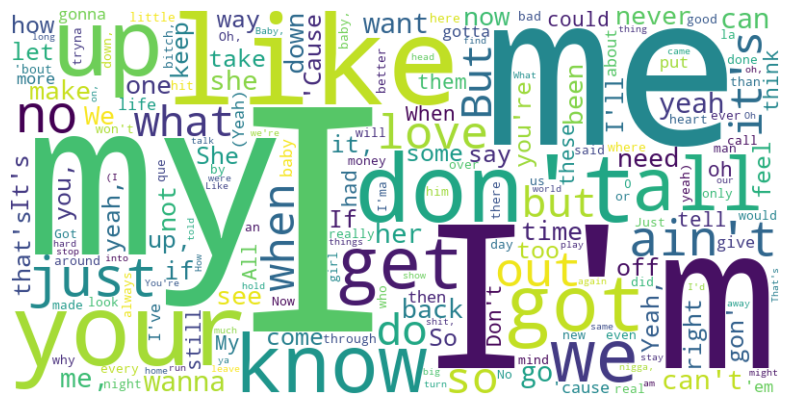

In [38]:
# Convert the filtered words and counts to a dictionary
filtered_word_dict = dict(filtered_words_counts)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate_from_frequencies(filtered_word_dict)

# Display the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

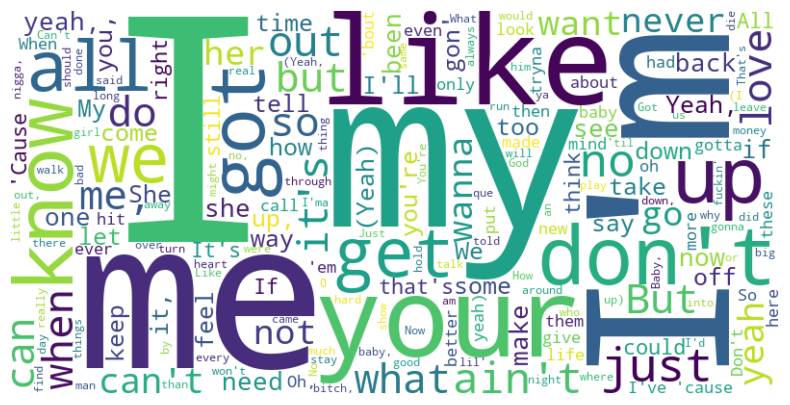

In [39]:
# Convert the filtered words and counts to a dictionary
unique_words_counts_popular_songs_dict = dict(popular_filtered_words_counts)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate_from_frequencies(unique_words_counts_popular_songs_dict)

# Display the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
#I do not know where the Lowest Peak Position is coming from so I didn't use these following charts
# Assuming topStreamedSongs_df is your DataFrame
# Group by 'Song Name' and calculate the maximum 'Peak Position' for each song
max_peak_position = merged_df2.groupby('Song Name')['Peak Position'].max().reset_index()

# Merge the calculated maximum peak position back to the original DataFrame
merged_df2 = pd.merge(merged_df2, max_peak_position, on='Song Name', how='left', suffixes=('', '_MaxPeak'))

# Rename the new column
merged_df2 = topStreamedSongs_df.rename(columns={'Peak Position_MaxPeak': 'Lowest Peak Position'})

# Display the updated DataFrame
display(merged_df2.head())

Position    Artist Name                                   Song Name  Days  \
0         1   Post Malone   Sunflower  SpiderMan: Into the SpiderVerse  1506   
1         2    Juice WRLD                                 Lucid Dreams  1673   
2         3  Lil Uzi Vert                                XO TOUR Llif3  1853   
3         4       J. Cole                               No Role Modelz  2547   
4         5   Post Malone                                     rockstar  1223   

   Top 10 (xTimes)  Peak Position Peak Position (xTimes)  Peak Streams  \
0              302              1                  (x29)       2118242   
1              178              1                  (x20)       2127668   
2              212              1                   (x4)       1660502   
3                6              7                      0        659366   
4              186              1                 (x124)       2905678   

   Total Streams  
0      883369738  
1      864832399  
2      781153024  
3      734857487  
4      718865961

In [41]:
# Assuming topStreamedSongs_df is your DataFrame
# Group by 'Song Name' and calculate the maximum and minimum 'Peak Position' for each song
peak_position_stats = merged_df2.groupby('Song Name')['Peak Position'].agg(['max', 'min']).reset_index()

# Merge the calculated peak position statistics back to the original DataFrame
merged_df2 = pd.merge(merged_df2, peak_position_stats, on='Song Name', how='left', suffixes=('', '_Stats'))

# Calculate the variance between 'Peak Position' and 'Lowest Peak Position'
merged_df2['Peak Position Variance'] = merged_df2['max'] - merged_df2['min']

# Drop the unnecessary columns
merged_df2 = merged_df2.drop(['max', 'min'], axis=1)

# Display the updated DataFrame
display(merged_df2.head())

Position    Artist Name                                   Song Name  Days  \
0         1   Post Malone   Sunflower  SpiderMan: Into the SpiderVerse  1506   
1         2    Juice WRLD                                 Lucid Dreams  1673   
2         3  Lil Uzi Vert                                XO TOUR Llif3  1853   
3         4       J. Cole                               No Role Modelz  2547   
4         5   Post Malone                                     rockstar  1223   

   Top 10 (xTimes)  Peak Position Peak Position (xTimes)  Peak Streams  \
0              302              1                  (x29)       2118242   
1              178              1                  (x20)       2127668   
2              212              1                   (x4)       1660502   
3                6              7                      0        659366   
4              186              1                 (x124)       2905678   

   Total Streams  Peak Position Variance  
0      883369738                     0.0  
1      864832399                   186.0  
2      781153024                     0.0  
3      734857487                     0.0  
4      718865961                     0.0

In [42]:
# Calculate the sum of 'Total Streams' for each 'Artist Name'
artist_total_streams = merged_df2.groupby('Artist Name')['Total Streams'].sum().reset_index()

# Merge the artist total streams back to the original DataFrame
merged_df2 = pd.merge(merged_df2, artist_total_streams, on='Artist Name', how='left', suffixes=('', '_Artist'))

# Calculate the 'Percentage of Artist Total Streams' for each song
merged_df2['Percentage of Artist Total Streams'] = (merged_df2['Total Streams'] / merged_df2['Total Streams_Artist']) * 100

# Display the updated DataFrame
display(merged_df2.head())

Position    Artist Name                                   Song Name  Days  \
0         1   Post Malone   Sunflower  SpiderMan: Into the SpiderVerse  1506   
1         2    Juice WRLD                                 Lucid Dreams  1673   
2         3  Lil Uzi Vert                                XO TOUR Llif3  1853   
3         4       J. Cole                               No Role Modelz  2547   
4         5   Post Malone                                     rockstar  1223   

   Top 10 (xTimes)  Peak Position Peak Position (xTimes)  Peak Streams  \
0              302              1                  (x29)       2118242   
1              178              1                  (x20)       2127668   
2              212              1                   (x4)       1660502   
3                6              7                      0        659366   
4              186              1                 (x124)       2905678   

   Total Streams  Peak Position Variance  Total Streams_Artist  \
0      883369738                     0.0            7400199432   
1      864832399                   186.0            4857996474   
2      781153024                     0.0            2915127161   
3      734857487                     0.0            2663931014   
4      718865961                     0.0            7400199432   

   Percentage of Artist Total Streams  
0                           11.937107  
1                           17.802244  
2                           26.796533  
3                           27.585455  
4                            9.714143